# Manual switching of the torque

We now investigate a single simple manual switch of the EM torque. This is for both
components: the anomalous and spindown torque. 

In [29]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
import numpy as np
%matplotlib inline

plt.style.use("thesis")

from nsmod.manual_switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

c = 3e10
R = 1e6
I0 = 1e45

## Parameters constant for all simulations

In [30]:
# Parameters
chi0 = 50
epsI3 = 1e-5
B0 = 1e15
epsA = B0**2 * R**5 / (4 * I0 * c**2) 
omega0 = 10000
tauP = 2 * np.pi/(epsI3 * omega0)
T = 10.2 * tauP

# Switch Parameters
AnomTorqueSwitching=False
SwitchTime = T/2.
upsilon = 0.005

# Set it to minimal precession
beta = np.degrees(Physics_Functions.Beta_Function(epsI3, epsA, chi0))
P = 2 * np.pi / omega0
tauS =  3 * c / (2 * R * epsA * omega0**2)
spindown_angle = P / (tauS * epsI3)
a0 = beta #- np.degrees(spindown_angle)

# Simulation parameters
n = 500000
error = 1e-11

noise=None

BETA FUNCTION IS USED
Assuming chi has been given in degrees rather than radians


## No switching

BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
AnomTorqueSwitching : 1.0000000000e+00
Bs : 1.0003999200e+15
DeltaPhi_49 : 3.2580006805e-02
DeltaPhi_49_SpindownTorque : 3.2570919833e-02
DeltaPhi_63 : 2.3626631858e+01
DeltaPhi_75 : 2.7331655200e-01
DeltaPhi_TS : -0.0000000000e+00
EMtorqueAmplificationfactor : 2.2782454749e+03
P : 6.2831853072e-04
SpindownTorqueSwitching : 1.0000000000e+00
SwitchTime : 3.2000000000e+02
T : 6.4100000000e+02
a0 : -7.7973050340e-01
beta : -7.8035098409e-01
beta30 : -6.9929566425e-01
beta75 : -3.8882017370e-01
chi0 : 5.0000000000e+01
delta_omega_dot0_EM : 9.8322387066e-01
delta_omega_dot0_FP : -1.1419193235e-04
delta_omega_dot0_FP_EM : -8.2810625640e-02
epsA : 2.7800000000e-07
epsI1 : 0.0000000000e+00
epsI3 : 1.0000000000e-05
n : 5.0000000000e+05
nu_dot0 : -5.7697945202e-01
omega0 : 1.0000000000e+04
omega_dot0 : -3.6252688155e+00
source_script : Unknown
tauA : 2.2601385997e+03
tauE : 2.7584161366e+03
tauP : 6.2837671672e+01
tauS : 1

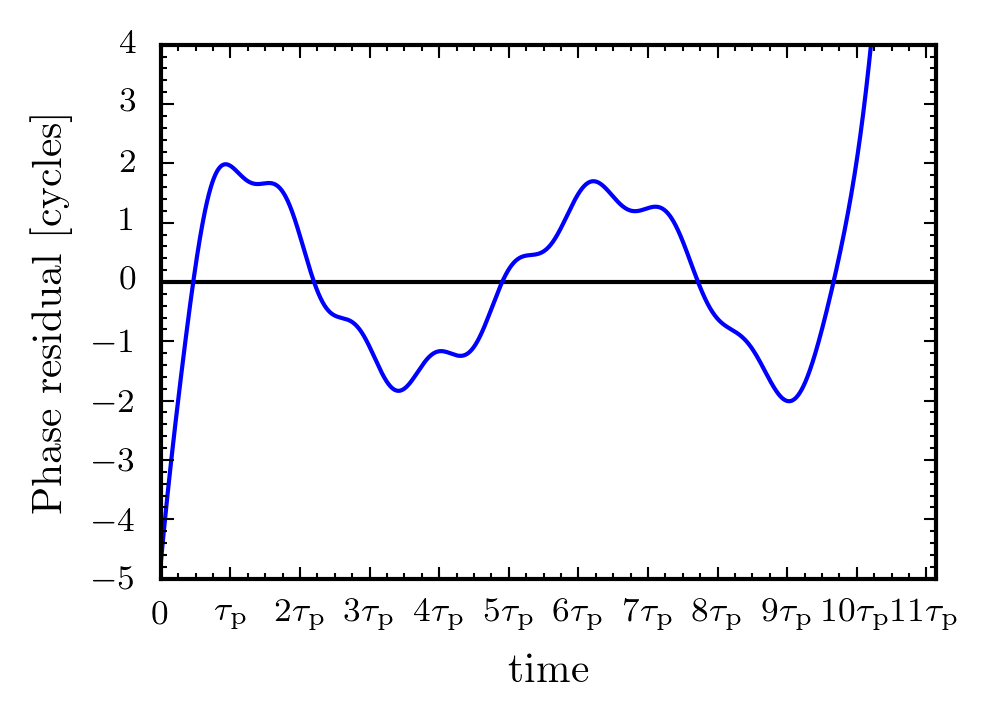

BETA FUNCTION IS USED
BETA FUNCTION IS USED


In [31]:
upsilonOFF = 0

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 SwitchTime=SwitchTime, upsilon=upsilonOFF)

File_Functions.PrintParameterDictionary(file_name)

ax1 = Plot.PhaseResidual(file_name, order=4, noise=noise, color="b")
#ax1.legend()
plt.tight_layout()
plt.savefig("img/NoSwitching.pdf")
plt.show()

File_Functions.PropertiesTable(file_name, "NoSwitching")


In [32]:
PD = File_Functions.Parameter_Dictionary(file_name)
PD['omega0'] / float(PD['tauS']) / (2*np.pi) * PD['DeltaPhi_63']

BETA FUNCTION IS USED
BETA FUNCTION IS USED


23.23

## Switching: without Anomalous torque

BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
AnomTorqueSwitching : 0.0000000000e+00
Bs : 1.0003999200e+15
DeltaPhi_49 : 3.2580006805e-02
DeltaPhi_49_SpindownTorque : 3.2570919833e-02
DeltaPhi_63 : 2.3626631858e+01
DeltaPhi_75 : 2.7331655200e-01
DeltaPhi_TS : -3.7238851904e+04
EMtorqueAmplificationfactor : 2.2782454749e+03
P : 6.2831853072e-04
SpindownTorqueSwitching : 1.0000000000e+00
SwitchTime : 3.2000000000e+02
T : 6.4100000000e+02
a0 : -7.7973050340e-01
beta : -7.8035098409e-01
beta30 : -6.9929566425e-01
beta75 : -3.8882017370e-01
chi0 : 5.0000000000e+01
delta_omega_dot0_EM : 9.8322387066e-01
delta_omega_dot0_FP : -1.1419193235e-04
delta_omega_dot0_FP_EM : -8.2810625640e-02
epsA : 2.7800000000e-07
epsI1 : 0.0000000000e+00
epsI3 : 1.0000000000e-05
n : 5.0000000000e+05
nu_dot0 : -5.7697945202e-01
omega0 : 1.0000000000e+04
omega_dot0 : -3.6252688155e+00
source_script : Unknown
tauA : 2.2601385997e+03
tauE : 2.7584161366e+03
tauP : 6.2837671672e+01
tauS : 1

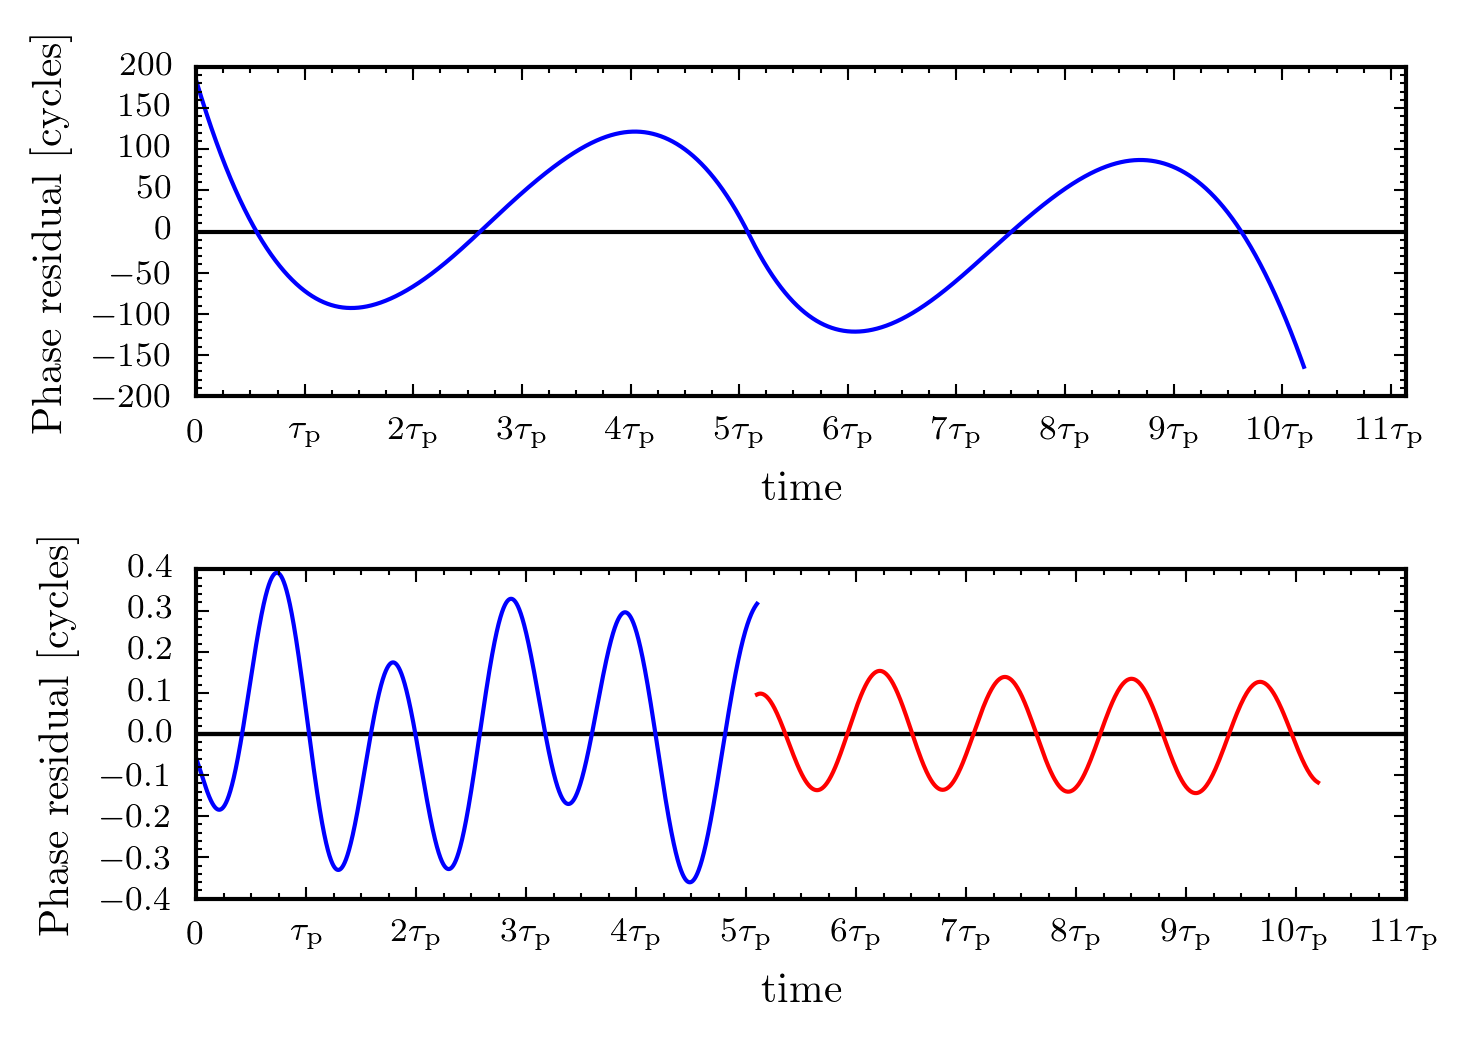

In [33]:
AnomTorqueSwitching=False
upsilon = 0.4

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 SwitchTime=SwitchTime, upsilon=upsilon, 
                 AnomTorqueSwitching=AnomTorqueSwitching)

File_Functions.PrintParameterDictionary(file_name)


fig1, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5, 3.5))
ax1 = Plot.PhaseResidual(file_name, ax=ax1, noise=noise, color="b", order=4)
leg = plt.legend()

ax2 = Plot.PhaseResidual(file_name, ax=ax2, noise=noise, color="b",
                           tstart=0, tend=SwitchTime, order=4)
ax2 = Plot.PhaseResidual(file_name, ax=ax2,  noise=noise, color="r",
                         tstart=SwitchTime, tend=None, order=4)
plt.tight_layout()
plt.savefig("img/SwitchingWithoutAnomTorque.pdf")
plt.show()

## Switching: with anomalous torque

BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
AnomTorqueSwitching : 1.0000000000e+00
Bs : 1.0003999200e+15
DeltaPhi_49 : 3.2580006805e-02
DeltaPhi_49_SpindownTorque : 3.2570919833e-02
DeltaPhi_63 : 2.3626631858e+01
DeltaPhi_75 : 2.7331655200e-01
DeltaPhi_TS : -9.3097129760e+02
EMtorqueAmplificationfactor : 2.2782454749e+03
P : 6.2831853072e-04
SpindownTorqueSwitching : 1.0000000000e+00
SwitchTime : 3.2000000000e+02
T : 6.4100000000e+02
a0 : -7.7973050340e-01
beta : -7.8035098409e-01
beta30 : -6.9929566425e-01
beta75 : -3.8882017370e-01
chi0 : 5.0000000000e+01
delta_omega_dot0_EM : 9.8322387066e-01
delta_omega_dot0_FP : -1.1419193235e-04
delta_omega_dot0_FP_EM : -8.2810625640e-02
epsA : 2.7800000000e-07
epsI1 : 0.0000000000e+00
epsI3 : 1.0000000000e-05
n : 5.0000000000e+05
nu_dot0 : -5.7697945202e-01
omega0 : 1.0000000000e+04
omega_dot0 : -3.6252688155e+00
source_script : Unknown
tauA : 2.2601385997e+03
tauE : 2.7584161366e+03
tauP : 6.2837671672e+01
tauS : 1

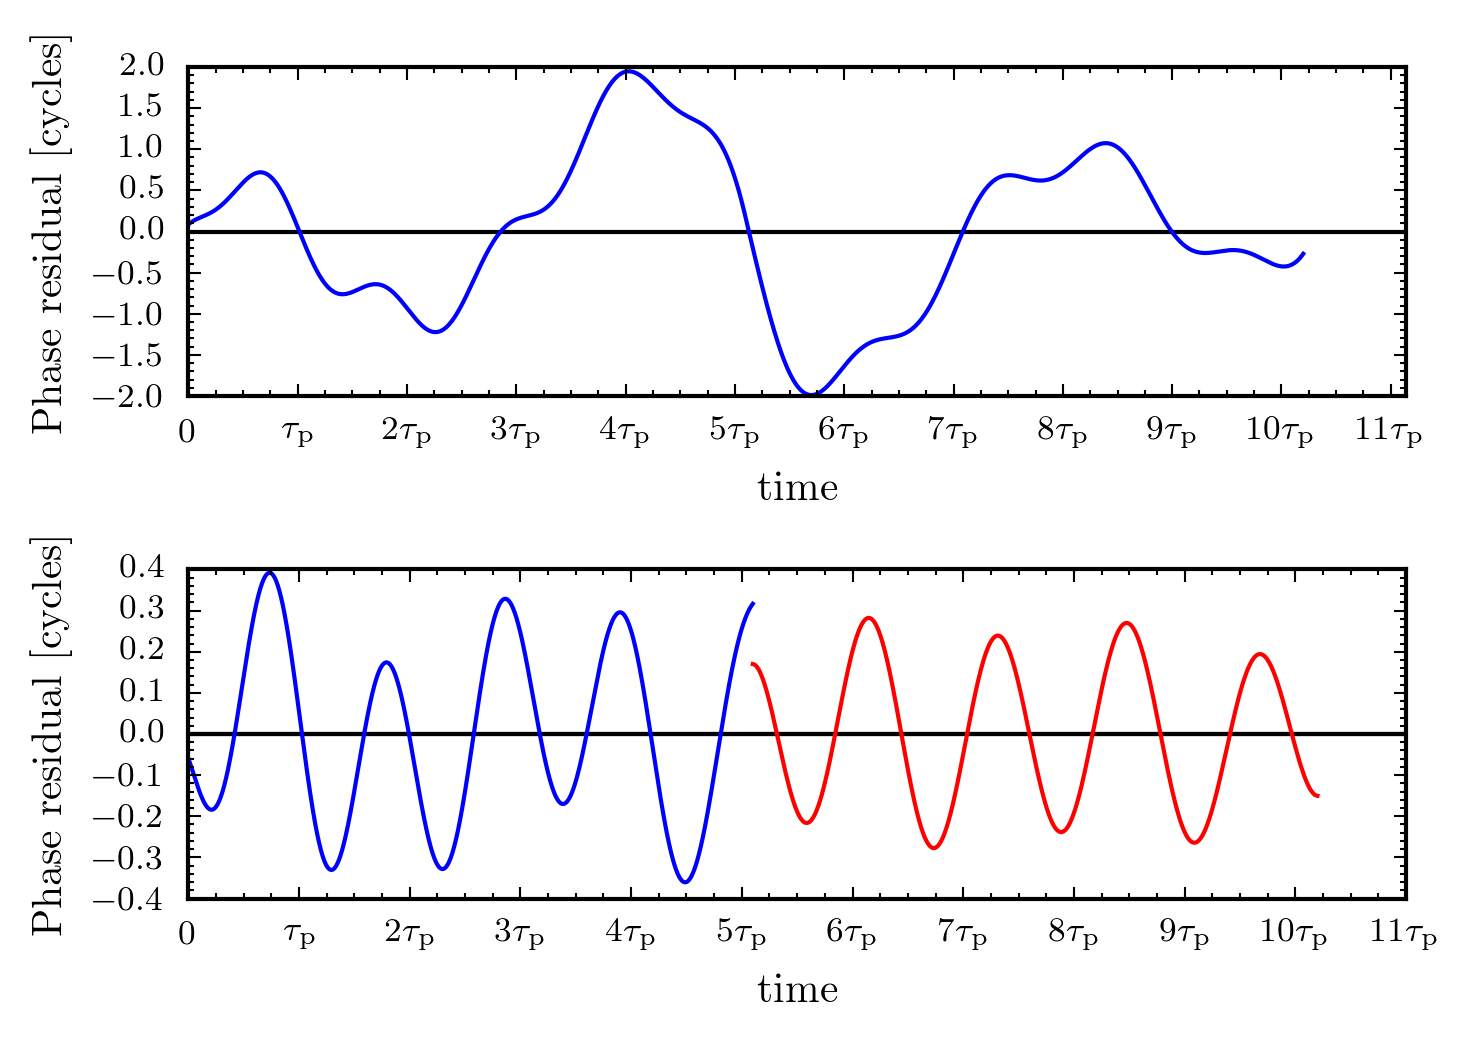

In [34]:
AnomTorqueSwitching=True
upsilon = 0.01
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 SwitchTime=SwitchTime, upsilon=upsilon, 
                 AnomTorque=AnomTorqueSwitching)

File_Functions.PrintParameterDictionary(file_name)

fig1, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5, 3.5))
ax1 = Plot.PhaseResidual(file_name, ax=ax1, noise=noise, color="b", order=4)
leg = plt.legend()

ax2 = Plot.PhaseResidual(file_name, ax=ax2, noise=noise, color="b", order=4,
                         tstart=0, tend=SwitchTime)
ax2 = Plot.PhaseResidual(file_name, ax=ax2, noise=noise, color="r", order=4,
                         tstart=SwitchTime, tend=None)

plt.tight_layout()
plt.savefig("img/SwitchingWithAnomTorque.pdf")
plt.show()